# Continuing from previous discussion

## Exploring various transformation extracted for ncc, pce and pce0

In [18]:
library(manipulate)
library(mixtools)
library(manipulate)
library(mixtools)



## Looking at the distributions before transformation

In [3]:
### list of edge list extracted for ncc, pce and pce0
edgeList_ncc <- read.table("/home/anandgavai/Sherlock3/cluster-analysis/data/pentax/edgelist-pentax-ncc.txt",sep=" ")
edgeList_pce <- read.table("/home/anandgavai/Sherlock3/cluster-analysis/data/pentax/edgelist-pentax-pce.txt",sep=" ")
edgeList_pce0 <- read.table("/home/anandgavai/Sherlock3/cluster-analysis/data/pentax/edgelist-pentax-pce0.txt",sep=" ")

## Looking only at pce log transformed 

### Reference: Large Scale Test of Sensor Fingerprint Camera Identification (Goljan et. al, (2009))

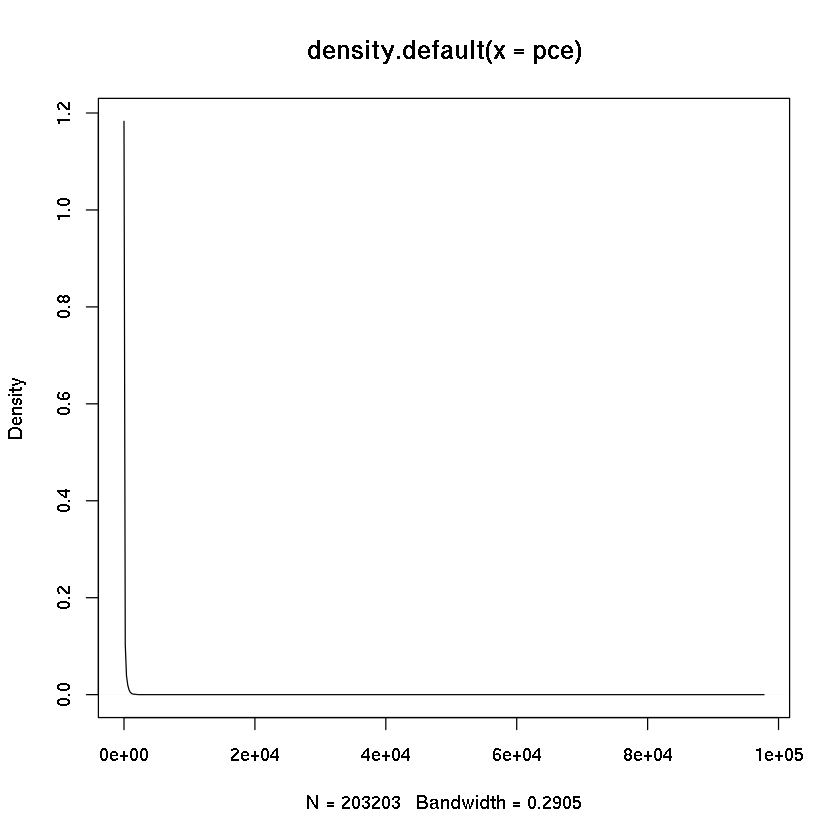

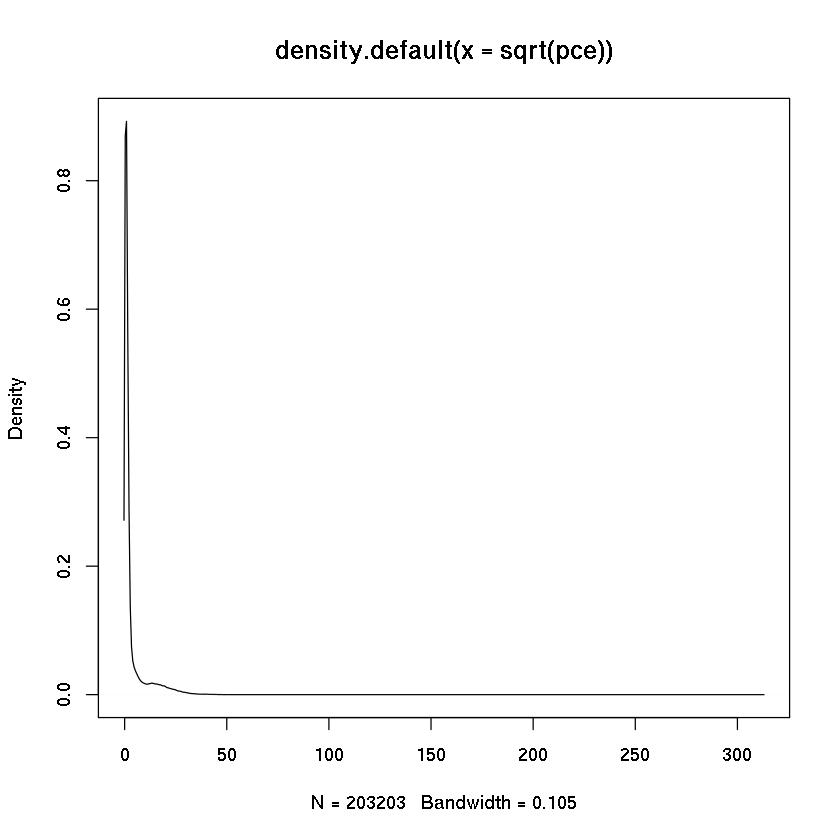

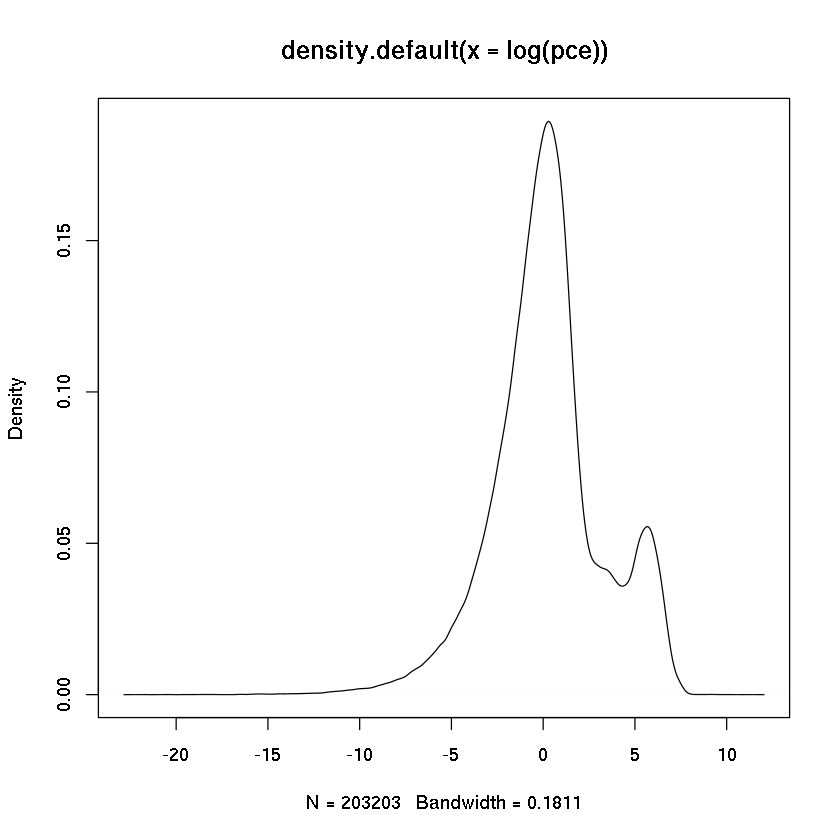

In [5]:
##pce
pce<-edgeList_pce[,3]
plot(density(pce))
plot(density(sqrt(pce)))
plot(density(log(pce)))


### Use log transfored values

In [19]:
# example only for pce values, log transformed
pce_log<-log(pce)


## Before removing outliers

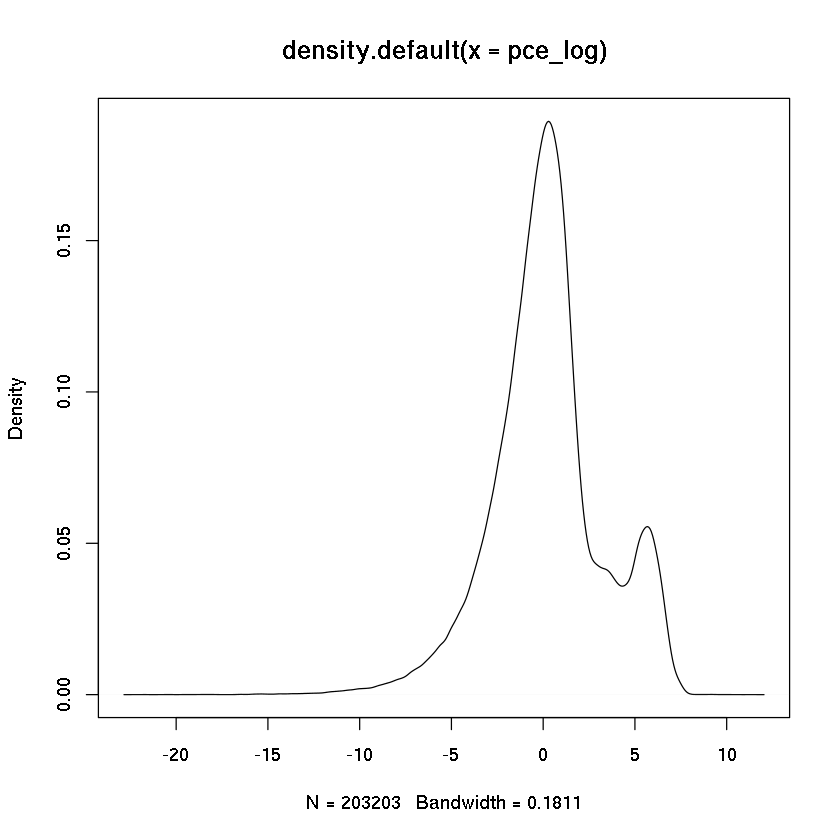

In [21]:
plot(density(pce_log))

## After removing outliers

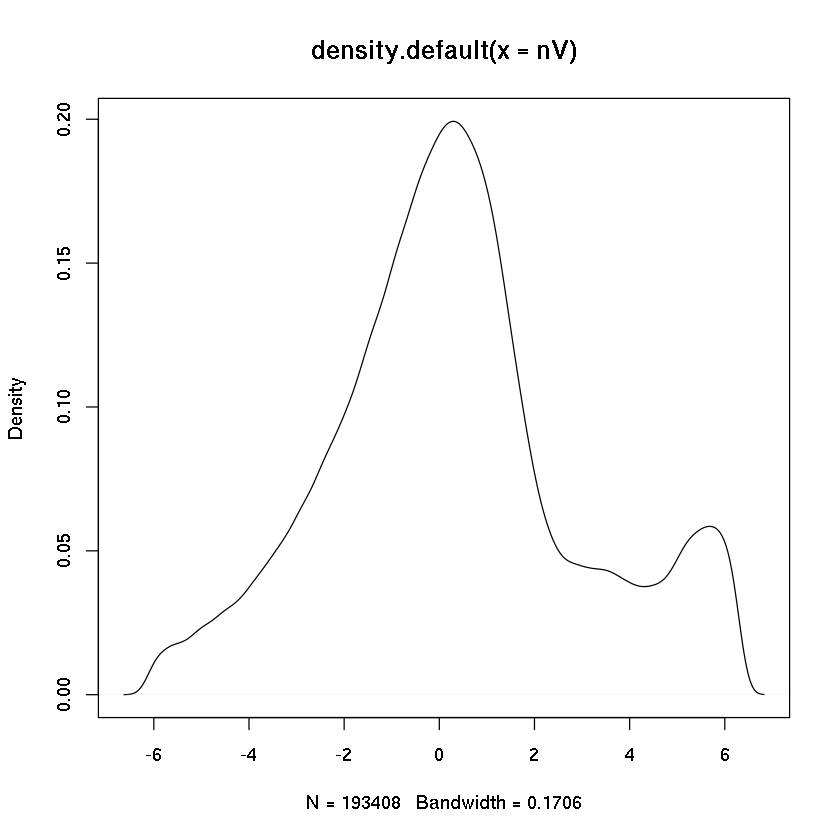

In [9]:
#remove outliers from the distribution
nV<-pce_log[!pce_log %in% boxplot.stats(pce_log)$out]
plot(density(nV))

## Identify cutoffs in this bimodal distribution

## Monte carlo simulation based on EM algorithm

number of iterations= 68 


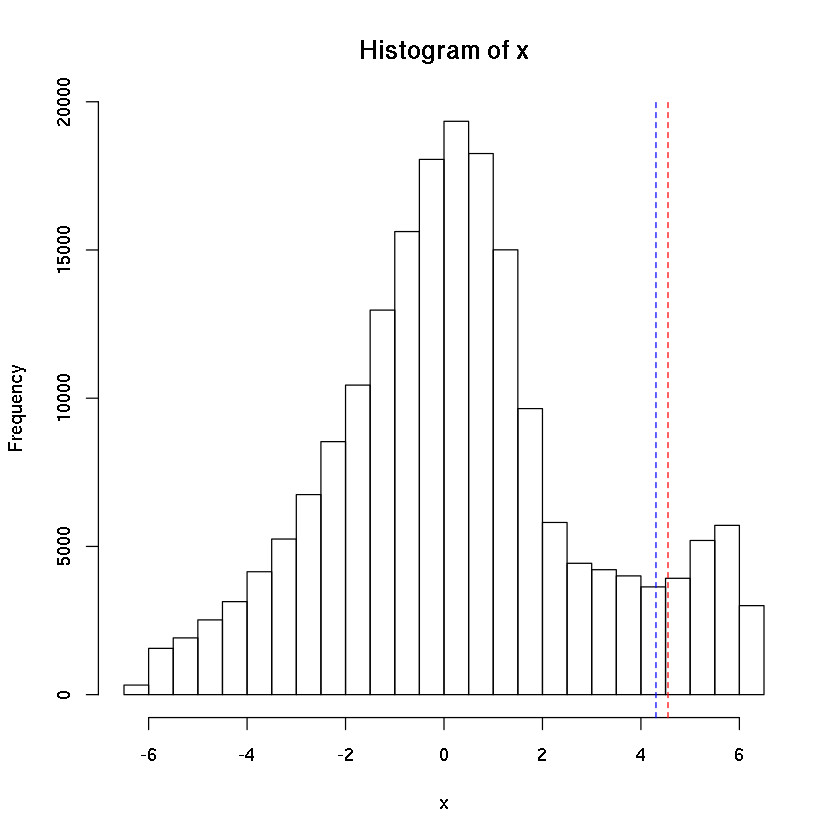

In [24]:

x<-nV
model <- normalmixEM(x=x, k=2)
index.lower <- which.min(model$mu)  # Index of component with lower mean

find.cutoff <- function(proba=0.5, i=index.lower) {
  ## Cutoff such that Pr[drawn from bad component] == proba
  f <- function(x) {
    proba - (model$lambda[i]*dnorm(x, model$mu[i], model$sigma[i]) /
               (model$lambda[1]*dnorm(x, model$mu[1], model$sigma[1]) + model$lambda[2]*dnorm(x, model$mu[2], model$sigma[2])))
  }
  return(uniroot(f=f, lower= as.numeric(quantile(x,0.05)), upper=as.numeric(quantile(x,0.95)))$root)  
}

cutoffs <- c(find.cutoff(proba=0.5), find.cutoff(proba=0.75)) 

hist(x)
abline(v=cutoffs, col=c("red", "blue"), lty=2)


In [25]:
cutoffs

[1] 4.550140 4.305595

In [26]:
mean(cutoffs)

[1] 4.427867